In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data = pd.read_csv("ProcessedChat.csv", index_col=0)
Data['Year'] = Data['Year'].astype(np.int32)
Data['Day'] = Data['Day'].astype(np.int32)
Data['Hour'] = Data['Hour'].astype(np.int32)
Data['Minute'] = Data['Minute'].astype(np.int32)
Data.drop(Data[Data.Sender == 'Notification'].index, inplace= True)
Data.reset_index(inplace=True, drop= True)
Data.head()

,Message,Sender,Year,Month,Day,Hour,Minute
0,Interviews me issi me karvate hai\n,Rishi,2022,December,27,12,1
1,"Interview toh nhi hi dena hai, degree le bhi l...",Dani,2022,December,27,12,1
2,Chutoya h bsdk ....unka khudka environment hot...,Shushu Bhai IIITDM,2022,December,27,12,1
3,Jake dekh yt pe google kisme karvata hai inter...,Rishi,2022,December,27,12,1
4,@919179170555 kya liya hai bhai NPTEL?\n,Dani,2022,December,27,12,2


In [3]:
Data.dtypes

Message    object
Sender     object
Year        int32
Month      object
Day         int32
Hour        int32
Minute      int32
dtype: object

In [4]:
# Message send by Total message send by eveyone
BusyUsers  = Data.Sender.value_counts().head(7)
BusyUsers

Sender
Dani                  1338
Rishi                 1130
Pushkar Bhai          1032
Booboo Bhai            892
Yusuf IIITDM           365
Shushu Bhai IIITDM     261
Ayush                  198
Name: count, dtype: int64

In [5]:
plt.figure(figsize=(12,5))
# plt.bar(BusyUsers.index, BusyUsers.values)

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Calculating the percentage of Message sent

In [6]:
round((Data.Sender.value_counts()/Data.shape[0])*100,2).reset_index().rename(columns = {'count':"Percent"})
# This is in the form of a DataFrame

,Sender,Percent
0,Dani,25.65
1,Rishi,21.66
2,Pushkar Bhai,19.79
3,Booboo Bhai,17.10
4,Yusuf IIITDM,7.00
5,Shushu Bhai IIITDM,5.00
6,Ayush,3.80


Getting top words

In [7]:
f = open('stopwords_hinglish.txt', 'r')
stpwrds = f.read().split('\n')
f.close()

words = []
for msg in Data['Message'] :
    if msg == '<Media omitted>\n':
        continue
    for wrd in str(msg).lower().split():
        if wrd not in stpwrds:
            words.append(wrd)

words

['interviews',
 'karvate',
 'interview',
 'dena',
 'hai,',
 'degree',
 'lu',
 'galti',
 'chutoya',
 'bsdk',
 '....unka',
 'khudka',
 'environment',
 'jake',
 'yt',
 'google',
 'kisme',
 'karvata',
 'interview',
 '@919179170555',
 'nptel?',
 'maut',
 'farman',
 'point',
 'aate',
 '😂😂',
 'ha',
 'sirf',
 'google',
 'bsdk',
 '....microsoft',
 'amazon',
 'krvata',
 'python',
 'cloud',
 'cloud',
 'business',
 'ek?',
 '+1',
 'bussiness',
 'sem',
 'hmmm..',
 'sem',
 '22',
 'cred',
 'himara',
 'ooooohhh',
 'nice',
 'yaad',
 'dilao',
 'behen',
 'lawde',
 '@916261247221',
 'timetable',
 'khali',
 'hai?',
 '🤣',
 'courses',
 'humse',
 'zadda',
 'credit',
 'zadda',
 'bsdk',
 'point',
 'raho',
 'n',
 'aabi',
 'bhare',
 'timetable',
 'jaan',
 'lete',
 'external',
 'mummi',
 'cloud',
 'bhejoge',
 'syllabus?',
 'kya*',
 'hmmm',
 'site',
 'konsi',
 'nptel',
 'deadline',
 'kb',
 'tk',
 'hai???',
 'precise',
 'time',
 'sham',
 'beje',
 'bhar',
 'dete',
 'aabi',
 'abc',
 'id',
 'bi',
 'dekhna',
 '....meko',

In [8]:
from collections import Counter
ct = Counter(words)
Cmn_wrds = pd.DataFrame(ct.most_common(len(ct)))
Cmn_wrds.head(50)


,0,1
0,baat,85
1,🙂,78
2,ha,73
3,madarchod,67
4,aa,65
5,ky,57
6,n,52
7,😂😂,49
8,kr,49
9,😅😅,48


## Analysing Emojis

In [9]:
import emoji
Data.head()

,Message,Sender,Year,Month,Day,Hour,Minute
0,Interviews me issi me karvate hai\n,Rishi,2022,December,27,12,1
1,"Interview toh nhi hi dena hai, degree le bhi l...",Dani,2022,December,27,12,1
2,Chutoya h bsdk ....unka khudka environment hot...,Shushu Bhai IIITDM,2022,December,27,12,1
3,Jake dekh yt pe google kisme karvata hai inter...,Rishi,2022,December,27,12,1
4,@919179170555 kya liya hai bhai NPTEL?\n,Dani,2022,December,27,12,2


In [10]:
used_emojis= []
for msg in Data.Message :
    for ch in str(msg):
        if emoji.is_emoji(ch):
            used_emojis.append(ch)
    # used_emojis.extend([em for em in emoji.UNICODE_EMOJI['en']])
len(used_emojis)

1790

In [11]:
emoji_count = Counter(used_emojis)
emoji_count

used_emojis=pd.DataFrame(emoji_count.most_common(len(emoji_count)), index=range(len(emoji_count)))
used_emojis

,0,1
0,😂,459
1,🙂,298
2,🤣,199
3,😅,164
4,🥲,115
5,🙃,74
6,😏,72
7,👀,71
8,😌,39
9,🫂,31


In [12]:
ct = used_emojis.head(10)
ct.iloc[9,0]='Other'
ct.iloc[9,1]=sum(used_emojis[1][9:])
ct
# ct.add({0:'Others',1:sum(used_emojis[1][9:])})

,0,1
0,😂,459
1,🙂,298
2,🤣,199
3,😅,164
4,🥲,115
5,🙃,74
6,😏,72
7,👀,71
8,😌,39
9,Other,299


In [13]:
ct.dtypes

0    object
1     int64
dtype: object

## Analysing Time Based
- Month timeline
- Daily Timeline
- WeekDays Wise

In [14]:
Data.Month.value_counts()

Month
May          2284
July         1048
December      868
April         318
January       220
March         192
June          105
February       91
August         82
September       8
Name: count, dtype: int64

In [15]:
timeline = Data.groupby(['Year','Month']).count()['Message'].reset_index()
month_order = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
timeline['Month_num'] = timeline.Month.map(month_order)
timeline.sort_values(by=['Year','Month_num'],inplace=True)
timeline.reset_index(inplace=True,drop=True)
timeline

,Year,Month,Message,Month_num
0,2022,December,868,12
1,2023,January,220,1
2,2023,February,89,2
3,2023,March,192,3
4,2023,April,318,4
5,2023,May,2280,5
6,2023,June,103,6
7,2023,July,1048,7
8,2023,August,81,8
9,2023,September,8,9


In [16]:
time = []
for i in range(timeline.shape[0]):
    time.append(str(timeline.Year.iloc[i])+" - "+str(timeline.Month.iloc[i]))
timeline['Time'] = time
timeline

,Year,Month,Message,Month_num,Time
0,2022,December,868,12,2022 - December
1,2023,January,220,1,2023 - January
2,2023,February,89,2,2023 - February
3,2023,March,192,3,2023 - March
4,2023,April,318,4,2023 - April
5,2023,May,2280,5,2023 - May
6,2023,June,103,6,2023 - June
7,2023,July,1048,7,2023 - July
8,2023,August,81,8,2023 - August
9,2023,September,8,9,2023 - September


In [17]:
# plt.plot(timeline.Time, timeline.Message)
# plt.xticks(rotation= 60)
# plt.title("Message sent timeline")
# plt.show()

## Daily Timeline

In [18]:
Data

,Message,Sender,Year,Month,Day,Hour,Minute
0,Interviews me issi me karvate hai\n,Rishi,2022,December,27,12,1
1,"Interview toh nhi hi dena hai, degree le bhi l...",Dani,2022,December,27,12,1
2,Chutoya h bsdk ....unka khudka environment hot...,Shushu Bhai IIITDM,2022,December,27,12,1
3,Jake dekh yt pe google kisme karvata hai inter...,Rishi,2022,December,27,12,1
4,@919179170555 kya liya hai bhai NPTEL?\n,Dani,2022,December,27,12,2
...,...,...,...,...,...,...,...
5211,11 log the class me jab attendance li thi\n,Rishi,2023,September,1,8,14
5212,Rohit log ko attendance lene ke pehle gate pe ...,Rishi,2023,September,1,8,15
5213,Fir 11 logo ka attendance li\n,Rishi,2023,September,1,8,15
5214,Abe situation kitni gambhir hai issa andaza is...,Rishi,2023,September,1,8,15


In [19]:
Data['Date'] = pd.to_datetime(Data['Year'].astype(str)+ '-' + Data['Month'].astype(str) + '-' + Data['Day'].astype(str))
print(type(Data.Date))
Data

<class 'pandas.core.series.Series'>


,Message,Sender,Year,Month,Day,Hour,Minute,Date
0,Interviews me issi me karvate hai\n,Rishi,2022,December,27,12,1,2022-12-27
1,"Interview toh nhi hi dena hai, degree le bhi l...",Dani,2022,December,27,12,1,2022-12-27
2,Chutoya h bsdk ....unka khudka environment hot...,Shushu Bhai IIITDM,2022,December,27,12,1,2022-12-27
3,Jake dekh yt pe google kisme karvata hai inter...,Rishi,2022,December,27,12,1,2022-12-27
4,@919179170555 kya liya hai bhai NPTEL?\n,Dani,2022,December,27,12,2,2022-12-27
...,...,...,...,...,...,...,...,...
5211,11 log the class me jab attendance li thi\n,Rishi,2023,September,1,8,14,2023-09-01
5212,Rohit log ko attendance lene ke pehle gate pe ...,Rishi,2023,September,1,8,15,2023-09-01
5213,Fir 11 logo ka attendance li\n,Rishi,2023,September,1,8,15,2023-09-01
5214,Abe situation kitni gambhir hai issa andaza is...,Rishi,2023,September,1,8,15,2023-09-01


In [20]:
DailyCount = Data.groupby(Data.Date).count()['Message'].reset_index()
DailyCount

,Date,Message
0,2022-12-27,473
1,2022-12-28,194
2,2022-12-29,108
3,2022-12-30,26
4,2022-12-31,67
...,...,...
127,2023-08-28,1
128,2023-08-29,1
129,2023-08-30,2
130,2023-08-31,15


In [21]:
# plt.figure(figsize=(12,8))
# DailyCount.plot('Date', 'Message',figsize=(12,8))
# plt.title('Daily Message Timeline')
# plt.show()

### Week Days time line

In [22]:
Data.head()

,Message,Sender,Year,Month,Day,Hour,Minute,Date
0,Interviews me issi me karvate hai\n,Rishi,2022,December,27,12,1,2022-12-27
1,"Interview toh nhi hi dena hai, degree le bhi l...",Dani,2022,December,27,12,1,2022-12-27
2,Chutoya h bsdk ....unka khudka environment hot...,Shushu Bhai IIITDM,2022,December,27,12,1,2022-12-27
3,Jake dekh yt pe google kisme karvata hai inter...,Rishi,2022,December,27,12,1,2022-12-27
4,@919179170555 kya liya hai bhai NPTEL?\n,Dani,2022,December,27,12,2,2022-12-27


In [23]:
Data['WeekDay'] = Data['Date'].dt.day_name()
Data.sample(15)

,Message,Sender,Year,Month,Day,Hour,Minute,Date,WeekDay
3338,Nahi bhai ye toh hostel me hi baat ho rhi thi ...,Dani,2023,May,26,20,32,2023-05-26,Friday
2170,Ki kisi kaam ka hai ya nahi\n,Dani,2023,May,7,23,27,2023-05-07,Sunday
2276,Vo sidhi sadhi h usko kuch n bolo meri harshit...,Booboo Bhai,2023,May,9,9,40,2023-05-09,Tuesday
3462,Thora thora?\n,Pushkar Bhai,2023,May,28,11,51,2023-05-28,Sunday
5157,<Media omitted>\n,Dani,2023,August,14,9,26,2023-08-14,Monday
341,🥹🥹🥹🥹\n,Booboo Bhai,2022,December,27,23,43,2022-12-27,Tuesday
2336,@918826568914 kuch miss kar rha toh batao\n,Dani,2023,May,10,16,7,2023-05-10,Wednesday
4318,She can do bro\n,Rishi,2023,July,15,20,53,2023-07-15,Saturday
1571,<Media omitted>\n,Booboo Bhai,2023,April,24,21,45,2023-04-24,Monday
2240,Ky krre ho bhai 🥲\n,Booboo Bhai,2023,May,9,9,35,2023-05-09,Tuesday


In [24]:
Data['WeekDay'].value_counts().reset_index()

,WeekDay,count
0,Tuesday,1290
1,Sunday,834
2,Thursday,729
3,Wednesday,701
4,Saturday,611
5,Monday,562
6,Friday,489


In [25]:
# type(Data['WeekDay'][0])
Data.groupby('WeekDay').count()['Message'].reset_index()

,WeekDay,Message
0,Friday,489
1,Monday,562
2,Saturday,610
3,Sunday,833
4,Thursday,729
5,Tuesday,1286
6,Wednesday,698


## Working on HeatMap


In [26]:
Data.head()

,Message,Sender,Year,Month,Day,Hour,Minute,Date,WeekDay
0,Interviews me issi me karvate hai\n,Rishi,2022,December,27,12,1,2022-12-27,Tuesday
1,"Interview toh nhi hi dena hai, degree le bhi l...",Dani,2022,December,27,12,1,2022-12-27,Tuesday
2,Chutoya h bsdk ....unka khudka environment hot...,Shushu Bhai IIITDM,2022,December,27,12,1,2022-12-27,Tuesday
3,Jake dekh yt pe google kisme karvata hai inter...,Rishi,2022,December,27,12,1,2022-12-27,Tuesday
4,@919179170555 kya liya hai bhai NPTEL?\n,Dani,2022,December,27,12,2,2022-12-27,Tuesday


In [35]:
htmp = Data.groupby(['WeekDay','Hour']).count()['Message'].reset_index()
htmp = htmp.pivot_table(index= 'WeekDay', columns='Hour', values='Message', fill_value=0)
htmp

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
WeekDay,,,,,,,,,,,,,,,,,,,,,
Friday,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,10.0,...,5.0,3.0,7.0,4.0,24.0,77.0,75.0,116.0,33.0,40.0
Monday,25.0,19.0,5.0,7.0,3.0,8.0,0.0,1.0,0.0,16.0,...,14.0,13.0,22.0,21.0,76.0,56.0,18.0,91.0,39.0,47.0
Saturday,4.0,44.0,4.0,0.0,0.0,0.0,3.0,1.0,4.0,12.0,...,24.0,9.0,22.0,0.0,37.0,5.0,183.0,72.0,28.0,85.0
Sunday,63.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,15.0,6.0,13.0,1.0,47.0,20.0,24.0,16.0,104.0,400.0
Thursday,10.0,0.0,6.0,3.0,0.0,1.0,5.0,2.0,2.0,2.0,...,31.0,8.0,6.0,5.0,23.0,4.0,125.0,15.0,2.0,110.0
Tuesday,215.0,7.0,10.0,0.0,0.0,0.0,6.0,3.0,3.0,63.0,...,11.0,6.0,57.0,9.0,18.0,48.0,65.0,30.0,157.0,194.0
Wednesday,105.0,101.0,8.0,2.0,15.0,17.0,0.0,5.0,69.0,18.0,...,3.0,15.0,55.0,4.0,16.0,22.0,18.0,70.0,15.0,32.0


TypeError: cannot convert the series to <class 'int'>

In [33]:
# htmp.fillna(0)
# type(htmp.iloc[0][0])

numpy.float64

<Axes: xlabel='Hour', ylabel='WeekDay'>

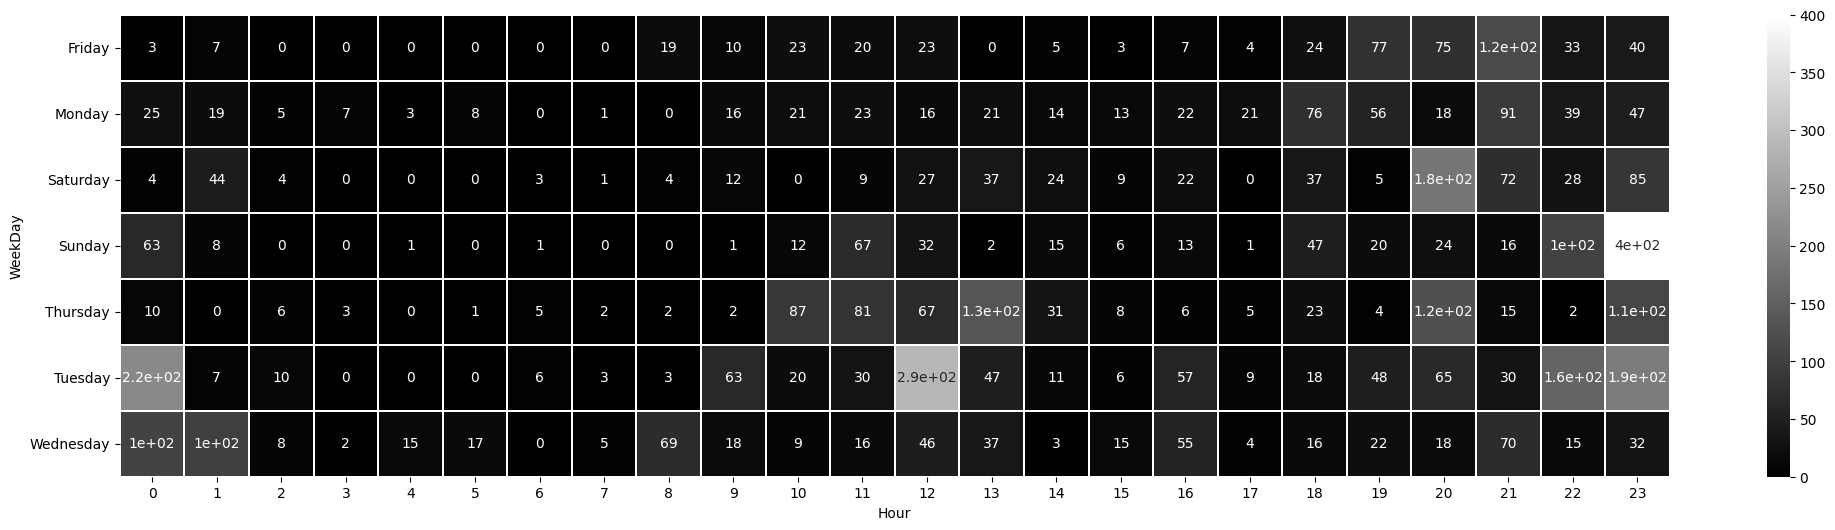

In [63]:
import seaborn as sns
plt.figure(figsize=(25,6))
sns.heatmap(htmp,annot = True, cmap = 'gist_gray',linewidths='0.1')

In [64]:
htmp

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
WeekDay,,,,,,,,,,,,,,,,,,,,,
Friday,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,10.0,...,5.0,3.0,7.0,4.0,24.0,77.0,75.0,116.0,33.0,40.0
Monday,25.0,19.0,5.0,7.0,3.0,8.0,0.0,1.0,0.0,16.0,...,14.0,13.0,22.0,21.0,76.0,56.0,18.0,91.0,39.0,47.0
Saturday,4.0,44.0,4.0,0.0,0.0,0.0,3.0,1.0,4.0,12.0,...,24.0,9.0,22.0,0.0,37.0,5.0,183.0,72.0,28.0,85.0
Sunday,63.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,15.0,6.0,13.0,1.0,47.0,20.0,24.0,16.0,104.0,400.0
Thursday,10.0,0.0,6.0,3.0,0.0,1.0,5.0,2.0,2.0,2.0,...,31.0,8.0,6.0,5.0,23.0,4.0,125.0,15.0,2.0,110.0
Tuesday,215.0,7.0,10.0,0.0,0.0,0.0,6.0,3.0,3.0,63.0,...,11.0,6.0,57.0,9.0,18.0,48.0,65.0,30.0,157.0,194.0
Wednesday,105.0,101.0,8.0,2.0,15.0,17.0,0.0,5.0,69.0,18.0,...,3.0,15.0,55.0,4.0,16.0,22.0,18.0,70.0,15.0,32.0
